In [0]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(123)

Code from Kaggle- 
#https://www.kaggle.com/ruslankl/k-means-clustering-pca

Allocating Cluster Numbers to the data 
#https://www.kaggle.com/prakharrathi25/weather-data-clustering-using-k-means



In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import pandas as pd
import io
Data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [6]:
# Sample of Data 
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
613,1739,WALKING_UPSTAIRS,0.241,-0.00873,-0.1060,-0.216,0.3220,-0.0801,-0.267,0.315,-0.124,-0.144,0.239,-0.108,-0.00806,-0.0447,0.466,0.0204,-0.691,-0.664,-0.620,-0.351,-0.0239,-0.472,0.463,0.376,-0.152,-0.3340,0.25900,-0.1090,0.0766,-0.1920,0.1430,0.00736,0.185,-0.1450,0.0809,-0.0649,0.0856,-0.324,...,-0.781,-0.423,0.232,-0.841,0.4660,-0.820,-0.973,-0.2690,-0.284,-0.189,-0.460,-0.796,-0.2690,-0.676,-0.347,0.5720,-0.795,-0.138,-0.514,-0.832,-0.529,-0.677,-0.578,-0.782,-0.905,-0.529,-0.909,-0.458,0.461,-0.651,0.358,-0.726,-0.9410,0.86900,0.337,-0.916,0.7750,-0.686,0.314,0.034
2306,6598,WALKING_DOWNSTAIRS,0.238,-0.03990,-0.1580,0.284,0.2270,-0.1330,0.245,0.214,-0.169,0.623,0.258,-0.401,-0.08310,0.0248,0.132,0.2640,-0.176,-0.709,-0.658,0.201,-0.0497,-0.203,0.345,0.234,0.245,-0.2170,0.05410,-0.0314,0.3450,0.0475,-0.0105,0.14400,0.127,0.0450,0.1570,-0.1820,0.1010,-0.512,...,-0.497,-0.197,0.532,-0.873,0.1590,-0.205,-0.553,-0.0911,-0.279,-0.134,-0.470,-0.570,-0.0911,-0.601,-0.156,0.7530,-0.846,0.170,-0.587,-0.866,-0.260,-0.350,-0.324,-0.428,-0.747,-0.260,-0.736,-0.370,0.545,-0.873,0.302,-0.190,-0.5850,0.09500,-0.684,0.937,-0.6360,-0.749,0.235,0.127
800,2291,LAYING,0.280,-0.02310,-0.0998,-0.978,-0.9650,-0.9690,-0.980,-0.964,-0.970,-0.929,-0.561,-0.797,0.82400,0.6800,0.836,-0.9700,-1.000,-1.000,-0.999,-0.981,-0.9650,-0.970,-0.276,-0.581,-0.274,-0.1830,-0.00832,0.1180,0.0359,0.0469,-0.0692,-0.06490,0.389,0.1360,-0.1440,0.2060,-0.1540,0.479,...,-1.000,-0.990,-1.000,-0.143,0.4880,-0.604,-0.903,-0.9780,-0.957,-0.967,-0.947,-0.997,-0.9780,-0.999,-0.982,-0.6370,-1.000,-0.474,0.537,0.360,-0.992,-0.996,-0.994,-0.997,-0.988,-0.992,-1.000,-0.992,-1.000,-0.683,0.494,-0.863,-0.9560,-0.12800,0.262,-0.098,0.0558,0.420,-0.278,-0.714
1621,4615,LAYING,0.320,0.03790,-0.1530,-0.642,-0.5340,-0.7920,-0.647,-0.615,-0.788,-0.526,-0.160,-0.696,0.58800,0.4050,0.689,-0.6140,-0.934,-0.952,-0.975,-0.683,-0.7880,-0.791,0.385,0.410,-0.232,-0.0884,0.13000,-0.3640,0.2470,-0.0692,0.0456,0.01410,0.121,0.0129,-0.0357,0.3130,-0.4300,0.454,...,-0.972,-0.801,-0.195,-0.968,-0.0905,-0.232,-0.649,-0.7800,-0.648,-0.692,-0.697,-0.975,-0.7800,-0.941,-0.831,0.0962,-0.897,-0.558,-0.102,-0.549,-0.886,-0.910,-0.899,-0.920,-0.912,-0.886,-0.994,-0.896,-0.242,-0.968,0.309,-0.388,-0.7290,0.008

In [7]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (3609, 563)


In [8]:
Data.groupby(['activity']).rn.count()

activity
LAYING                681
SITTING               623
STANDING              668
WALKING               603
WALKING_DOWNSTAIRS    493
WALKING_UPSTAIRS      541
Name: rn, dtype: int64

In [9]:
#save labels as string
Labels = Data['activity']
Data = Data.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [10]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [0]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

In [19]:
# Dropped 2 columns - rn and activity 
Data.shape

(3609, 561)

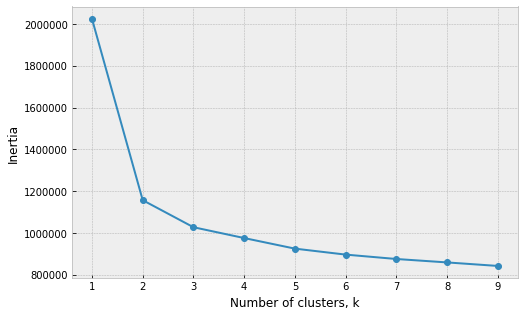

In [16]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [0]:
def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [22]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1156484   0.378   0.981   0.546   0.329   0.378    0.390


In [24]:
k_means(n_clust=6, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,554,21,0,0,0,0
1,0,0,0,248,311,97
2,1,0,0,329,107,438
3,20,445,479,0,0,0
4,0,0,0,26,75,4
5,106,157,189,0,0,2


inertia  homo    compl   v-meas   ARI     AMI     silhouette


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


895967   0.548   0.589   0.568   0.429   0.547    0.113


In [0]:
#change labels into binary: 0 - not moving, 1 - moving
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [26]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1156484   0.977   0.978   0.978   0.991   0.977    0.390


Principal Component Analysis is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

2-cluster algorithm seems to fbe able to find patterns for moving/not-moving labels perfectly so far, but let's see if it can still be improved by dimension reduction



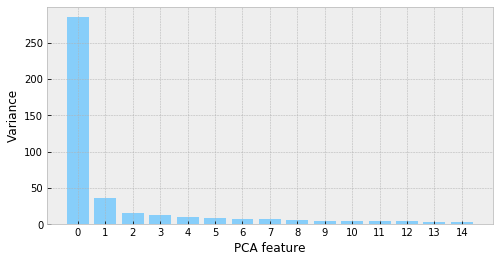

In [27]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

1 feature seems to be best fit for our algorithm.

In [0]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [0]:
# pca_transform(n_comp=3)
# k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels)

In [31]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1971,8
1,1,1629


inertia  homo    compl   v-meas   ARI     AMI     silhouette


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


168716   0.976   0.976   0.976   0.990   0.976    0.794


In [32]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,1969,6
1,3,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


295753   0.975   0.975   0.975   0.990   0.975    0.694
